# Projekt realizowany w ramach przedmiotu Metody Eksploracji Danych, Temat: Analiza Zbioru Danych Aplikacji Z Google Play Store Wraz Ze Stworzeniem Modelu Regresji Oceny i Ceny. 
## Autorzy: Marharyta Kruk, Bartosz Puszkarski

In [174]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Wstępna analiza danych

In [175]:
df = pd.read_csv("./dane/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [176]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Analiza cen

In [178]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [179]:
def price_to_number(price):
    if price in ["0", "Everyone"]:
        return 0
    return float(price[1:])

price_number = df.copy()
price_number["Price"] = df["Price"].apply(price_to_number)
print(sorted(price_number["Price"].unique()))


[0.0, 0.99, 1.0, 1.04, 1.2, 1.26, 1.29, 1.49, 1.5, 1.59, 1.61, 1.7, 1.75, 1.76, 1.96, 1.97, 1.99, 2.0, 2.49, 2.5, 2.56, 2.59, 2.6, 2.9, 2.95, 2.99, 3.02, 3.04, 3.08, 3.28, 3.49, 3.61, 3.88, 3.9, 3.95, 3.99, 4.29, 4.49, 4.59, 4.6, 4.77, 4.8, 4.84, 4.85, 4.99, 5.0, 5.49, 5.99, 6.49, 6.99, 7.49, 7.99, 8.49, 8.99, 9.0, 9.99, 10.0, 10.99, 11.99, 12.99, 13.99, 14.0, 14.99, 15.46, 15.99, 16.99, 17.99, 18.99, 19.4, 19.9, 19.99, 24.99, 25.99, 28.99, 29.99, 30.99, 33.99, 37.99, 39.99, 46.99, 74.99, 79.99, 89.99, 109.99, 154.99, 200.0, 299.99, 379.99, 389.99, 394.99, 399.99, 400.0]


In [180]:
grouped_price = price_number[price_number['Type']=='Paid']

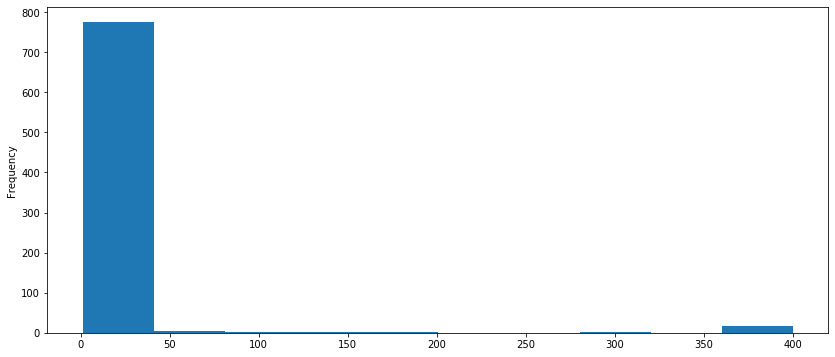

In [181]:
plt.figure(figsize=(14, 6))
grouped_price['Price'].plot.hist()

In [182]:
most_expansive = grouped_price[grouped_price['Price']>370]
most_expansive

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100+,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,"10,000+",Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,"100,000+",Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,"10,000+",Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,"50,000+",Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,"1,000+",Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22M,"1,000+",Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965k,"5,000+",Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5362,I Am Rich Pro,FAMILY,4.4,201,2.7M,"5,000+",Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up


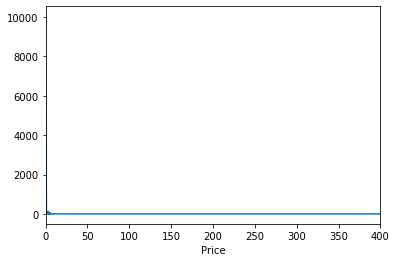

In [183]:
grouped_price = price_number.groupby("Price").count()
grouped_price["App"].index
grouped_price["App"].plot()


Jak widać nie ma za wiele drogich aplikacji

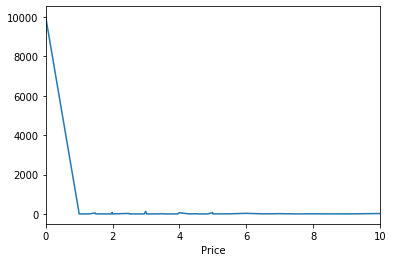

In [184]:
grouped_price.drop([10.99, 11.99, 12.99, 13.99, 14.0, 14.99, 15.46, 15.99, 16.99, 17.99, 18.99, 19.4, 19.9, 19.99, 24.99, 25.99, 28.99, 29.99, 30.99, 33.99, 37.99, 39.99, 46.99, 74.99, 79.99, 89.99, 109.99, 154.99, 200.0, 299.99, 379.99, 389.99, 394.99, 399.99, 400.0])["App"].plot()

In [185]:
total = grouped_price["App"].sum()
less_than_one_and_a_half = grouped_price["App"].loc[0:1.5].sum()
print("Aplikacje o cenie < 1.5 $ stanowią", less_than_one_and_a_half / total, "% całości")

Aplikacje o cenie < 1.5 $ stanowią 0.9448390369892077 % całości


## Analiza ratingu

In [186]:
df["Rating"].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

### Wyrzucamy anomalię

In [187]:
anomaly = df["Rating"] == 19.0
df[anomaly]
df = df.drop(df.index[df["Rating"].idxmax()])

In [188]:
df["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

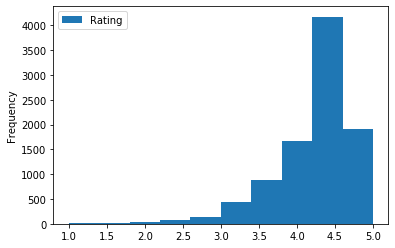

In [189]:
df.plot.hist(by="Rating")

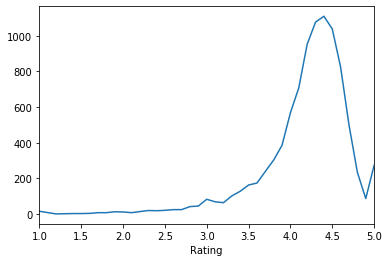

In [190]:
counted_ratings = df.groupby("Rating").count()["App"]
counted_ratings.plot()

In [191]:
wrongs = 0
for i in df["Reviews"].unique():
    try: 
        int(i)
    except ValueError:
        wrongs += 1
        print("Wartość nie jest liczbą: ", i)
        
print("Kolumna zawiera: ", wrongs, " wartości, które nie są liczbami.")

Kolumna zawiera:  0  wartości, które nie są liczbami.


In [192]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

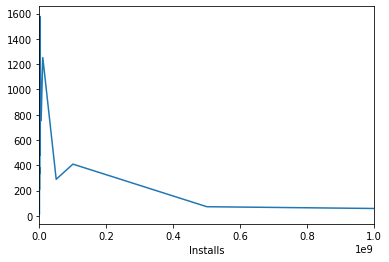

In [193]:
def installs_to_int(install):
    if install in ["0", "0+", "Free"]:
        return 0
    install = install.replace(",", "")[:-1]
    return int(install)


with_installs_as_integers = df.copy()
with_installs_as_integers["Installs"] = df["Installs"].apply(installs_to_int)

counted = with_installs_as_integers.groupby("Installs").count()
counted["App"].plot()

Obcięcie skrajnie największych wartości


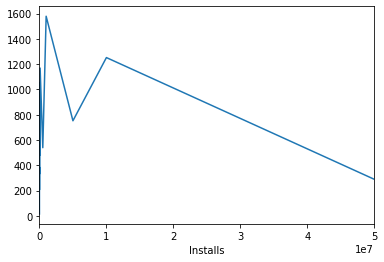

In [194]:
print("Obcięcie skrajnie największych wartości")
counted["App"][:-3].plot()


## Typ aplikacji(płatna/bezpłatna)

In [195]:
df["Type"].unique()

array(['Free', 'Paid', nan], dtype=object)

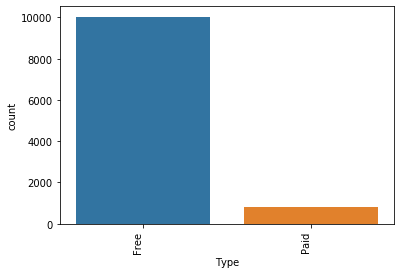

In [196]:
g = sns.countplot(x='Type', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

### Większość aplikacji jest bezpłatna

In [197]:
paid = df[df['Type']=='Paid']
free = df[df['Type']=='Free']
paid = paid[['Type', 'Rating']].groupby(by='Type').mean()
free = free[['Type', 'Rating']].groupby(by='Type').mean()
print(f'Średni rating dla płatnych: {paid.iloc[0, 0]} Średni rating dla bezpłatnych: {free.iloc[0, 0]}')

Średni rating dla płatnych: 4.266615146831529 Średni rating dla bezpłatnych: 4.186202546163562


## Wersji

In [200]:
df["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

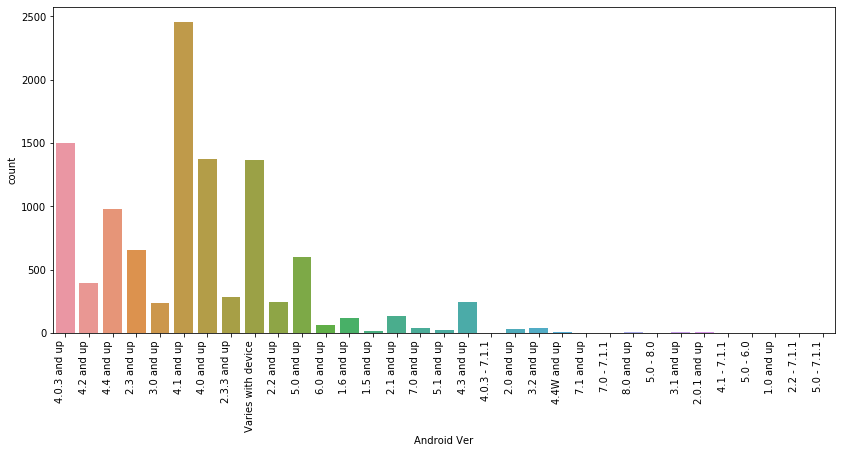

In [201]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='Android Ver', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

## Rating kontentu

In [202]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

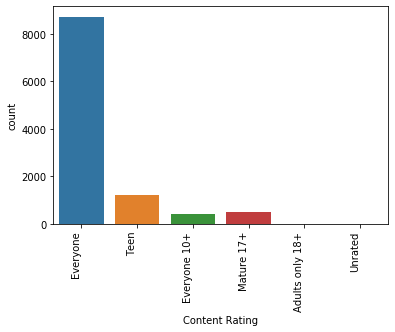

In [203]:
g = sns.countplot(x='Content Rating', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

Najmniej oceniania: Unrated, najbardziej oceniania: Adults only 18+


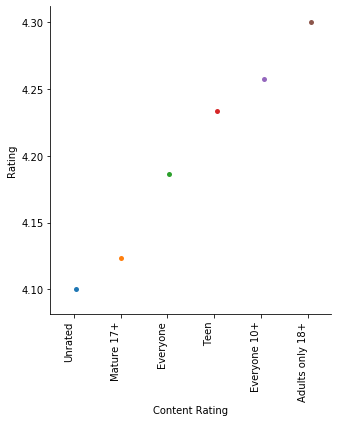

In [204]:
categories = df[['Content Rating', 'Rating']].groupby('Content Rating').mean()
categories_sorted = categories.sort_values(by='Rating')
najm = categories_sorted.idxmin()['Rating']
najw = categories_sorted.idxmax()['Rating']
print(f'Najmniej oceniania: {najm}, najbardziej oceniania: {najw}')
categories_sorted.reset_index(inplace=True)
g = sns.catplot(x='Content Rating', y='Rating', data=categories_sorted)
g.set_xticklabels(rotation=90, ha="right")
g

In [205]:
df[df['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7312,Best CG Photography,FAMILY,NaN,1,2.5M,500+,Free,0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up
8266,DC Universe Online Map,TOOLS,4.1,1186,6.4M,"50,000+",Free,0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


Te dwie próbki nie wyglądają na coś istotnego, więc można to wyrzucić? 

## Rodzaje aplikacji

In [206]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

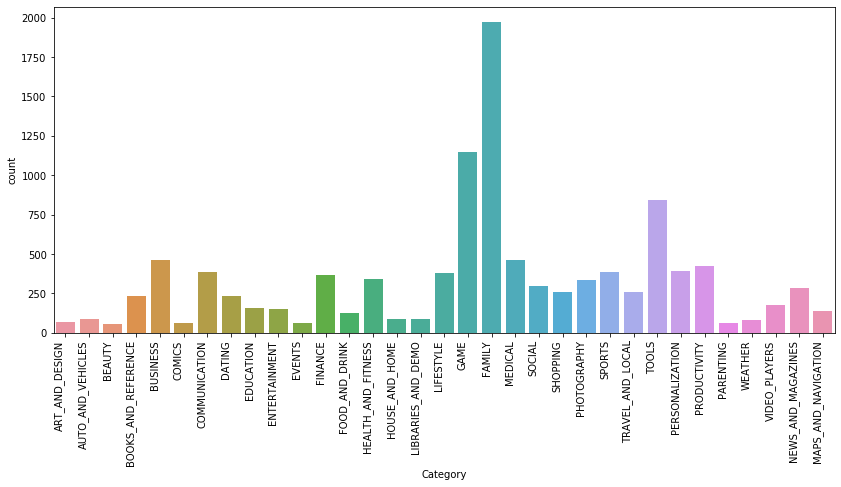

In [207]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='Category', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

Najmniej oceniana: DATING, najbardziej oceniana: EVENTS


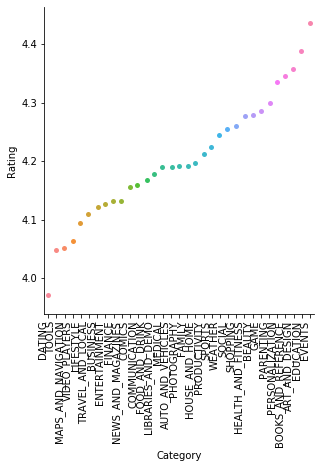

In [208]:
categories = df[['Category', 'Rating']].groupby('Category').mean()
categories_sorted = categories.sort_values(by='Rating')
najm = categories_sorted.idxmin()['Rating']
najw = categories_sorted.idxmax()['Rating']
print(f'Najmniej oceniana: {najm}, najbardziej oceniana: {najw}')
categories_sorted.reset_index(inplace=True)
g = sns.catplot(x='Category', y='Rating', data=categories_sorted)
g.set_xticklabels(rotation=90, ha="right")
g

## Gatunki

In [209]:
df['Genres'].value_counts()

Tools                     842
Entertainment             623
Education                 549
Medical                   463
Business                  460
                         ... 
Comics;Creativity           1
Lifestyle;Pretend Play      1
Trivia;Education            1
Parenting;Brain Games       1
Strategy;Education          1
Name: Genres, Length: 119, dtype: int64

Chyba można rozbić ostatnie dane po ; i połączyć w większe grupy


## Last updated

Trochę przekształcam dane w taki sposób, aby pokazywały, ile czasu minęło z ostatniego update'u. 

In [219]:
df['Last updated2'] = pd.to_datetime(df['Last Updated'])
print(df['Last updated2'].describe())
df['Last updated2'] = (df['Last updated2'] -  df['Last updated2'].max()).dt.days
df

count                   10840
unique                   1377
top       2018-08-03 00:00:00
freq                      326
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: Last updated2, dtype: object


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last updated2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,-213
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,-205
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,-7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,-61
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,-379
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,-33
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,-565
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,-1297


In [278]:
df.loc[df["Current Ver"]=="Varies with device"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last updated2
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,-61
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up,-25
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device,-9
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,-9
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up,-315
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device,-77
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device,-138
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,-1297


In [437]:
len(df["Current Ver"].unique())

2832

##  Pierwsze wnioski:
- Mamy 9367 niepustych obiektów w interesującej nas kolumnie **Rating**, wartości docelowo powinny wachać się w przedziale 1.0 -5.0, ale znajduje się jedna wartość 19.0.
- Z analizy kwantyli wynika, że ponad **75%** wszystkich istniejących **Ratingów** ma wartość **równą bądź wyższą 4.0**, bezpiecznym jest zatem stwierdzenie, ze możemy zastąpić brakujace wartości wartością równą medianie ( 4.30 )
- Wszystkie rekordy mają wartość w kolumnie **Price**, jest to jednak obecnie napis - zawiera symbol dolara plus wartość liczbową, znajduje się także etykieta Everyone. Wszystkie wartości możemy zastąpić zwykłą wartością liczbową pozbywając sie symbolu waluty, a wartość Everyone zastąpić zerem.
- Wartości w kolumnie **Reviews** są liczbami, z 1 wyjątkiem, który można po prostu zastąpić wartością liczbową 3.0M - 3 000 000 
- Kolumna **Installs** zawiera wartości kategoryczne, nie ciągłe - może zostać zastąpiona wartościami liczbowymi bez większego enkodowania bo jest kategoryczna porządkowa. Co więcej dominują mało popularne aplikacje.
- Kolumna **Type** zawiera jedynie informację czy aplikacja jest płatna, czy darmowa - można zastąpić binarną reprezentacją.
- Kolumna **Size** może być wartością liczbową -> wartości kategoryczne porządkowe. Problem napotykamy z wartościami rozmiaru różnymi dla różnych urżadzeń - warto dobrać wartość nie zmieniającą mediany.
- Kolumna **AndroidVer** może zostać zastąpiona wartością liczbową(flaot z najniższej dopuszczalnej wersji) - trzeba jednak znaleźć największą wartosć nie zmieniającą mediany, którą zastąpimy "Varies with device".
- Kolumna **Genres** jest rozszerzeniem kolumny **Category**, zawierającą dane jakościowe nominalne, co implikuje problem z jednoznacznym enkodowaniem - w pierwszej wersji opracowania danych pozbędziemy się tej kolumny celem zachowania gęstości macierzy dancyh. (Enkodowanie danych jakościowych metodą onehot stworzyło by rzadkie kolumny)
- Kolumna **Last Update** może zostać zastąpiona wynikiem różnicy jej zawartości z aktualną datą, dzięki czemu dostaniemy wartości numeryczne o istotnym znaczeniu (im większa wartość, tym bardziej aktualna jest aplikacja)
- Kolumna **Current Ver** daje nam znikomą ilość informacji przy porównywaniu rekordu z innymi - jest to cecha autonomiczna każdej aplikacji. Jedynie może wskazywać na rozwijalnosć aplikacji - im wyższa wersja tym więcej "unowocześnień" wdrożono. Dodatkowo, posiada ponad 2800 różnych wartości co wyklucza jej sensowne enkodowanie. Wartości są nieciągłe. Kolumnę można usunąć (usunięcie jedynie rekordów nam nie pasujących "Varies with device" powoduje usunięcie prawie 15% danych, co jest znaczącym ubytkiem).
- Kolumny **Current Ver, Size, Android Ver** wykazują zależność dla wartości "Varies with device", gdy znajduje się w jednej kolumnie to zazwyczaj pojawia się też w pozostałych
- Kolumna **App** zawierająca nazwę Aplikacji jest nam zbędna gdyż nie wnosi dodatkowych informacji

## Przygotowanie danych

In [404]:
playstore_df = pd.read_csv("./dane/googleplaystore.csv")

### Zastąpienie niepasujących wartości Ratings medianą

In [405]:
def validate_rating(rating):
    if not 1.0 <= rating <= 5.0:
        return 4.3
    return rating

In [406]:
playstore_df["Rating"] = playstore_df["Rating"].apply(validate_rating)

### Zamiana wartości napisowych na numerychne w kolumnie Price

In [407]:
playstore_df["Price"] = playstore_df["Price"].apply(price_to_number)

## Zmiana wartości kolumny Size na wartości liczbowe

In [408]:
def size_to_number(size):
    if size in "Varies with device":
        return 10
    try:
        float(size[:-1])
    except ValueError:
        size = size.replace(",", ".")
        
    return float(size[:-1])

Wartość 10 została dobrana eksperymentalnie jako najwyższa niezmieniająca mediany

In [409]:
playstore_df["Size"] = playstore_df["Size"].apply(size_to_number)

In [410]:
playstore_df["Size"].describe()

count    10841.000000
mean        32.805101
std         91.340033
min          1.000000
25%          6.800000
50%         10.000000
75%         28.000000
max       1020.000000
Name: Size, dtype: float64

## Enkodowanie One-Hot kolumny Type

In [411]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import math

In [412]:
def validate_type(t):
    if t!=t or t in '0':
        return 'Free'
    return t

In [413]:
playstore_df["Type"] = playstore_df["Type"].apply(validate_type)

In [414]:
encoder = LabelEncoder()
type_cat = playstore_df["Type"]
print(type_cat)
type_cat_encoded = encoder.fit_transform(type_cat)
type_cat_encoded

0        Free
1        Free
2        Free
3        Free
4        Free
         ... 
10836    Free
10837    Free
10838    Free
10839    Free
10840    Free
Name: Type, Length: 10841, dtype: object


array([0, 0, 0, ..., 0, 0, 0])

In [415]:
encoder.classes_

array(['Free', 'Paid'], dtype=object)

In [416]:
encoder = OneHotEncoder()
type_cat_1hot = encoder.fit_transform(type_cat_encoded.reshape(-1, 1))
type_cat_1hot

/home/puszkarb/.local/share/virtualenvs/analiza_danych-YSrzMn-_/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<10841x2 sparse matrix of type '<class 'numpy.float64'>'
	with 10841 stored elements in Compressed Sparse Row format>

In [417]:
type_cat_1hot.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [418]:
playstore_df.drop(["Type"], axis=1,  inplace=True)
playstore_df[["Free","Paid"]] = pd.DataFrame(type_cat_1hot.toarray())

## Encodowanie Kategorii aplikacji OneHot

In [419]:
encoder_categories = LabelEncoder()
categories_cat = playstore_df["Category"]
categories_cat


0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: Category, Length: 10841, dtype: object

In [420]:
categories_cat_encoded = encoder_categories.fit_transform(categories_cat)
categories_cat_encoded

array([ 1,  1,  1, ..., 21,  4, 19])

In [421]:
encoder_hot_categories = OneHotEncoder()
categories_cat_1hot = encoder.fit_transform(categories_cat_encoded.reshape(-1, 1))
categories_cat_1hot

/home/puszkarb/.local/share/virtualenvs/analiza_danych-YSrzMn-_/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<10841x34 sparse matrix of type '<class 'numpy.float64'>'
	with 10841 stored elements in Compressed Sparse Row format>

In [422]:
categories_cat_1hot.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [423]:
playstore_df[encoder_categories.classes_] = pd.DataFrame(categories_cat_1hot.toarray())

In [424]:
playstore_df.drop(["Category"], axis=1, inplace=True)

### Content Rating enkodowanie

In [425]:
def validate_content_rating(content):
    if content != content:
        return 'Unrated'
    return content

In [426]:

content_cat = playstore_df["Content Rating"].apply(validate_content_rating)
content_cat.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [427]:
rating_dict = {
    'Everyone': 0,
    'Everyone 10+': 1,
    'Teen': 2,
    'Mature 17+': 3,
    'Adults only 18+': 4,
    'Unrated': 5
}

playstore_df["Content_Rating_Ordinal"] = playstore_df["Content Rating"].map(rating_dict)

In [428]:
playstore_df.drop(["Content Rating"], axis=1, inplace=True)

## Usunięcie kolumny Genres jako zbędnej

In [429]:
playstore_df.drop(["Genres"], axis=1, inplace=True)

## Zastąpienie Last Update wynikiem różnicy dat. 

In [430]:
def transform_to_datetime(date):
    if "." in date:
        date.replace(".", "/")
        date = date[:3] + "1" + date[3:]
    return pd.to_datetime(date)
    

In [431]:
groud_true_date = pd.to_datetime("01/01/2020")
playstore_df["Last Updated"] = playstore_df["Last Updated"].apply(transform_to_datetime)
playstore_df['Last Updated'] = (playstore_df['Last Updated'] - groud_true_date).dt.days

## Installs na numeryczne

In [432]:
playstore_df["Installs"] = playstore_df["Installs"].apply(installs_to_int)

## Transformacja Android Ver na liczbę 

In [433]:
def transform_ver(ver):
    median = 4.03
    if ver!=ver:
        return median
    number = ver[:3]
    if "." in ver[3]:
        number += ver[4]
    try:
        transformed = float(number)
    except ValueError:
        # when ver equals to "Varies with device"
        return median
    return float(transformed)

In [434]:
playstore_df["Android Ver"] = playstore_df["Android Ver"].apply(transform_ver)
playstore_df["Android Ver"].describe()

count    10841.000000
mean         3.891988
std          0.784264
min          1.000000
25%          4.000000
50%          4.030000
75%          4.100000
max          8.000000
Name: Android Ver, dtype: float64

## Usunięcie kolumny Current Ver 

In [438]:
playstore_df.drop(["Current Ver"], axis=1, inplace=True)

## Usunięcie kolumny App 

In [440]:
playstore_df.drop(["App"], axis=1, inplace=True)

In [441]:
playstore_df.head()

,Rating,Reviews,Size,Installs,Price,Last Updated,Android Ver,Free,Paid,1.9,...,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Content_Rating_Ordinal
0,4.1,159,19.0,10000,0.0,-724,4.03,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.9,967,14.0,500000,0.0,-716,4.03,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.7,87510,8.7,5000000,0.0,-518,4.03,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.5,215644,25.0,50000000,0.0,-572,4.20,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,4.3,967,2.8,100000,0.0,-560,4.40,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Zbadanie korelacji

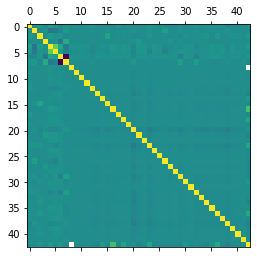

In [442]:
plt.matshow(playstore_df.corr())
plt.show()

##  Modele 

#### to mój komentarz! :
Jakie modele rozwarzamy? mogę wrzucić:
- DecisionTreeRegressor
- SupportVectorRegressor
- Regresja liniowa 

ale co więcej?